# Basis comparison
Compare reconstruction performance of different choices of basis:
* Raw input
* POD modes
* Random projections

We'll perform comparisons using Olivetti faces dataset from AT&T.

In [9]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

import pysensors as ps

Data consists of 10 pictures of 40 different people, each 64 x 64.

In [2]:
faces = datasets.fetch_olivetti_faces(shuffle=True, random_state=99)
X = faces.data

n_samples, n_features = X.shape
print(n_samples, n_features)

400 4096


In [3]:
# Global centering
X = X - X.mean(axis=0)

# Local centering
X -= X.mean(axis=1).reshape(n_samples, -1)

In [4]:
# From https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

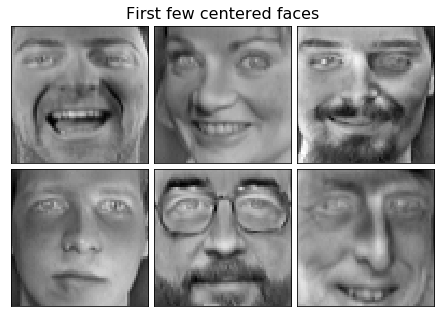

In [5]:
plot_gallery("First few centered faces", X[:n_components])

We'll learn the sensors using the first 300 faces and use the rest for testing reconstruction error. Arbitarily, we'll limit the bases to 100 modes.

In [6]:
X_train, X_test = X[:300], X[300:]

n_basis_modes = 100

In [10]:
models = [
    (
        'Identity',
        ps.SensorSelector(basis=ps.basis.Identity(n_basis_modes=n_basis_modes))
    ),
    (
        'POD',
        ps.SensorSelector(basis=ps.basis.POD(n_basis_modes=n_basis_modes))
    ),
    (
        'Random Projection',
        ps.SensorSelector(basis=ps.basis.RandomProjection(n_basis_modes=n_basis_modes))
    ),
]

/home2/bdesilva/Dropbox (uwamath)/Brian/Research/PySensors/pySensors/pysensors/basis/_identity.py:66: UserWarning: Only the first 100 examples were retained.
  warn(f"Only the first {self.n_basis_modes} examples were retained.")


Train time for Identity basis: 0.7198958396911621


IndexError: index 4032 is out of bounds for axis 0 with size 100

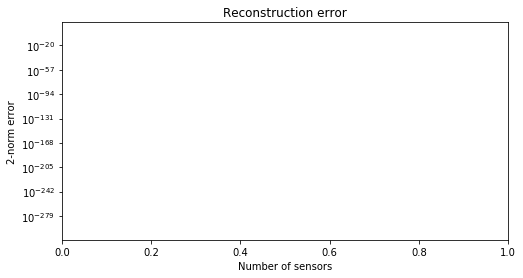

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(
    xlabel="Number of sensors",
    ylabel="2-norm error",
    title="Reconstruction error",
    yscale="log"
)

for name, model in models:
    t0 = -time()
    model.fit(X_train)
    print(f"Train time for {name} basis: {time() + t0}")
    
    errors = model.reconstruction_error(X_test)
    ax.plot(np.arange(1, len(errors) + 1), errors, label=name)
    
ax.legend()
plt.show()